In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
permits = pd.read_csv('permits_with_zip.csv', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
permits.head()

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,Community Areas,Zip Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux,full_street_nm,street_num_hundreds,addr_hundreds,zip,new_zip
0,1401011,100017796,PERMIT - ELEVATOR EQUIPMENT,2007-03-16,0.0,0.0,1680.0,1680.0,201,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,200,200 N LAKE SHORE DR,NaN,60611
1,2721703,100630781,PERMIT - ELECTRIC WIRING,2016-01-12,2000.0,0.0,75.0,75.0,2454,N,...,NaN,NaN,NaN,NaN,NaN,N ASHLAND AVE,2400,2400 N ASHLAND AVE,60614.0,60614
2,1655364,100097827,PERMIT - ELECTRIC WIRING,2006-04-07,743.0,0.0,40.0,40.0,5000,S,...,NaN,NaN,NaN,NaN,NaN,S CENTRAL AVE,5000,5000 S CENTRAL AVE,NaN,60638
3,1656480,100098521,PERMIT - SCAFFOLDING,2006-02-28,0.0,0.0,50.0,50.0,301,E,...,NaN,NaN,NaN,NaN,NaN,E NORTH AVE,300,300 E NORTH AVE,NaN,60610
4,1658995,100099989,PERMIT - ELECTRIC WIRING,2006-03-07,0.0,0.0,70.0,70.0,1324,S,...,NaN,NaN,NaN,NaN,NaN,S CENTRAL AVE,1300,1300 S CENTRAL AVE,NaN,60804


In [4]:
permits.shape

(578067, 142)

In [5]:
small_permits = permits.dropna(thresh=len(permits)*.80, axis=1)

In [6]:
small_permits.ISSUE_DATE = pd.DatetimeIndex(small_permits.ISSUE_DATE)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
small_permits.shape

(578067, 33)

In [8]:
small_permits.head()

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,Community Areas,Zip Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux,full_street_nm,street_num_hundreds,addr_hundreds,zip,new_zip
0,1401011,100017796,PERMIT - ELEVATOR EQUIPMENT,2007-03-16,0.0,0.0,1680.0,1680.0,201,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,200,200 N LAKE SHORE DR,NaN,60611
1,2721703,100630781,PERMIT - ELECTRIC WIRING,2016-01-12,2000.0,0.0,75.0,75.0,2454,N,...,NaN,NaN,NaN,NaN,NaN,N ASHLAND AVE,2400,2400 N ASHLAND AVE,60614.0,60614
2,1655364,100097827,PERMIT - ELECTRIC WIRING,2006-04-07,743.0,0.0,40.0,40.0,5000,S,...,NaN,NaN,NaN,NaN,NaN,S CENTRAL AVE,5000,5000 S CENTRAL AVE,NaN,60638
3,1656480,100098521,PERMIT - SCAFFOLDING,2006-02-28,0.0,0.0,50.0,50.0,301,E,...,NaN,NaN,NaN,NaN,NaN,E NORTH AVE,300,300 E NORTH AVE,NaN,60610
4,1658995,100099989,PERMIT - ELECTRIC WIRING,2006-03-07,0.0,0.0,70.0,70.0,1324,S,...,NaN,NaN,NaN,NaN,NaN,S CENTRAL AVE,1300,1300 S CENTRAL AVE,NaN,60804


In [9]:
small_permits = small_permits.drop(['street_num_hundreds','addr_hundreds','zip'],axis=1)

In [10]:
small_permits.to_csv('permits_with_zip_reduced.csv')

In [11]:
prices = pd.read_csv('all_pricing_data.csv', index_col=0)

In [12]:
prices.head()

,60657,60614,60640,60647,60618,60613,60625,60629,60610,60619,...,60601,60655,60646,60642,60633,reference_rate,GDP,chicago_pop,season,tax_rate_perc
2010-01-01,NaN,349.875000,NaN,249.791667,239.950000,NaN,224.242424,130.020790,NaN,NaN,...,NaN,195.326947,289.879650,NaN,NaN,0.11,15415.145,2693734,1,4.627
2010-02-01,NaN,333.975410,NaN,245.384615,243.498518,NaN,229.489796,132.697095,NaN,NaN,...,NaN,201.566223,286.716076,NaN,NaN,0.13,15557.277,2694384,1,4.931
2010-03-01,NaN,332.692308,NaN,243.389093,242.654325,NaN,223.751515,131.219577,NaN,NaN,...,NaN,199.733023,283.931872,NaN,NaN,0.16,15557.277,2694972,2,4.931
2010-04-01,NaN,324.875000,NaN,258.200323,245.098039,NaN,230.892372,131.146684,NaN,NaN,...,NaN,207.734882,286.049784,NaN,NaN,0.20,15557.277,2695624,2,4.931
2010-05-01,NaN,327.377422,NaN,249.000000,242.125996,NaN,227.212121,127.664234,NaN,NaN,...,NaN,206.861311,283.533261,NaN,NaN,0.20,15671.967,2696251,2,4.931


In [13]:
prices.index = pd.DatetimeIndex(prices.index)

In [14]:
zip_income = pd.read_csv(r'zip_income_data.csv', index_col=0)

In [15]:
zip_income.head()

,zipcode,total_agi,n_tax_returns,income_per_filing,year,lvl_1,lvl_2,lvl_3,lvl_4,lvl_5,lvl_6
0,60064,1.872610e+05,6542.0001,28.624426,2010,3809,1872,538,194,129,0
1,60185,8.975530e+05,15982.0000,56.160243,2010,6522,3775,1930,1338,1950,467
2,60411,8.708020e+05,24864.0000,35.022603,2010,12590,6636,3100,1433,1025,80
3,60601,1.138367e+06,6246.0000,182.255363,2010,1210,1141,1063,717,1253,862
4,60602,2.684500e+05,1476.0000,181.876694,2010,610,241,154,100,174,197


In [16]:
zip_income.shape

(448, 11)

In [17]:
housing_stock = pd.read_csv('housing_stock_data.csv', index_col=0)

In [18]:
housing_stock.head()

,index,zip_code,built_1990_1999,built_1980_1989,built_1970_1979,built_1960_1969,built_1950_1959,built_1940_1949,built_1939,owned,rented,built_2000_2009,built_2010_present,year
0,39,60064,518,314,847,849,847,574,1240,2627,2427,575,0,2011
1,125,60185,1927,1476,1818,1359,1245,223,1322,8002,2754,1863,0,2011
2,151,60411,1470,1044,4101,3441,4905,1437,3640,12646,6147,1663,0,2011
3,276,60601,837,1571,1293,763,159,69,281,1931,3399,2229,0,2011
4,277,60602,37,25,17,0,26,8,215,284,274,355,0,2011


In [19]:
housing_stock.shape

(448, 14)

In [20]:
home_price_data = pd.read_csv('Zip_Zhvi_AllHomes.csv')

In [25]:
home_price_data = home_price_data.set_index('Zip Code').transpose()

In [32]:
home_price_data.columns

Int64Index([60002, 60004, 60005, 60007, 60008, 60010, 60012, 60013, 60014,
            60015,
            ...
            62882, 62898, 62918, 62922, 62930, 62935, 62946, 62948, 62960,
            62974],
           dtype='int64', name='Zip Code', length=603)

In [74]:
def get_all_data_for_zip(zip_code, 
                         permits=small_permits, 
                         prices=prices, 
                         zip_income=zip_income, 
                         stock=housing_stock, 
                         home_price_data=home_price_data,
                         lags=12):
    # isolate permit data
    
    grouped_by_zip = permits[(permits.new_zip==int(zip_code)) &
        (permits.ISSUE_DATE >= prices[str(zip_code)].dropna().index.min()) &
        (permits.ISSUE_DATE <= prices[str(zip_code)].dropna().index.max())].copy()
    grouped_by_zip['month_dt'] = grouped_by_zip.ISSUE_DATE.dt.strftime('%Y%m')
    grouped_by_zip_counts = grouped_by_zip.groupby(['month_dt','PERMIT_TYPE'])[['ID']].count()
    grouped_by_zip_dollars = grouped_by_zip.groupby(['month_dt','PERMIT_TYPE'])[
        ['ESTIMATED_COST','AMOUNT_WAIVED','AMOUNT_PAID','TOTAL_FEE']].sum()
    
    grouped_by_zip_dollars['COUNT'] = grouped_by_zip_counts.ID
    
    grouped_by_zip_dollars['COUNT_DELTA'] = grouped_by_zip_counts.ID.diff()
    
    grouped_by_zip_dollars = grouped_by_zip_dollars.reset_index()
    
    date_indexed_df = pd.DataFrame(dict(date=(grouped_by_zip_dollars.month_dt.unique()) )).set_index('date')
    
    for perm_type,df in grouped_by_zip_dollars.groupby('PERMIT_TYPE'):
        df = df.set_index('month_dt')
        for col in df:
            if col != 'PERMIT_TYPE':
                date_indexed_df['{}_{}'.format(perm_type,col)] = df[col]
    
    date_indexed_df = date_indexed_df.fillna(0)
    

    
    # Add pricing data
    prices = prices.dropna(subset=[str(zip_code)])
    prices = prices.set_index(prices.index.strftime('%Y%m')).copy()
    
    date_indexed_df['price_per_square_foot'] = prices[str(zip_code)]
    date_indexed_df['frac_return'] = prices[str(zip_code)].pct_change()
    for lag in range(1,lags+1):
        date_indexed_df['psq_lag_{}'.format(lag)] = date_indexed_df['price_per_square_foot'].shift(lag)
        date_indexed_df['lag_{}'.format(lag)] = date_indexed_df.frac_return.shift(lag)
        date_indexed_df['forward_{}'.format(lag)] = date_indexed_df.frac_return.shift(-1*lag)
        
    for col in ['reference_rate','GDP','chicago_pop','season','tax_rate_perc']:
        date_indexed_df[col] = prices[col]
        date_indexed_df[col] = date_indexed_df[col].fillna(method='ffill')
            
    # Add home price data
    date_indexed_df['median_home_price'] = home_price_data[zip_code]
            
    # Add zip code specific data
    
    zip_data = zip_income[zip_income.zipcode==int(zip_code)].copy()
    zip_data = zip_data.set_index(zip_data.year.apply(lambda yr: str(yr)+'12')).copy()
    
    for col in zip_data.columns:
        date_indexed_df[col] = zip_data[col]
        date_indexed_df[col] = date_indexed_df[col].fillna(method='bfill')

        
    # Add Housing Stock Columns
    
    housing_stock_zip = stock[stock.zip_code==int(zip_code)].copy()
    housing_stock_zip = housing_stock_zip.set_index(housing_stock_zip.year.apply(lambda yr: str(yr)+'12')).copy()
    
    for col in housing_stock_zip.columns:
        date_indexed_df[col] = housing_stock_zip[col]
        date_indexed_df[col] = date_indexed_df[col].fillna(method='bfill')
        
    nrows = date_indexed_df.shape[0]
    date_indexed_df['test'] = [0 if i<nrows*.85 else 1 for i in range(date_indexed_df.shape[0])]
    
    return date_indexed_df
    
    
    
    

In [73]:
get_all_data_for_zip(60601).to_clipboard()

In [75]:
all_zips = set([int(z) for z in permits.new_zip.unique() if str(z) in prices.columns and z in home_price_data.columns])

In [76]:
len(all_zips)

42

In [77]:
reg_data_li = []
for z in tqdm_notebook(all_zips):
    t = get_all_data_for_zip(z)
    t = t.drop(['zip_code','zipcode'], axis=1)
    t['zip_code'] = str(z)
    if not t.empty:
        reg_data_li.append(t)

In [78]:
all_data_ever = pd.concat(reg_data_li, sort=False)

In [79]:
all_data_ever = all_data_ever.drop(['year','index'], axis=1)

In [80]:
all_data_ever.to_csv('merged_dataset_v2.csv')

In [69]:
all_data_ever.shape

(2894, 119)

In [71]:
all_data_ever[[c for c in all_data_ever.columns if 'lag' not in c and 'forward' not in c]].dropna().shape

(1671, 83)

In [210]:
dat_60622 = all_data_ever[all_data_ever.zip_code=='60622']

In [214]:
from scipy import stats
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

def acf_plot(series, nlags=12):
    """
    Plot the acf sort of like R does
    :param series: A pandas series that you want to run acf on
    :param nlags: The number of lags (default is 12)
    :return: The acf, limited to the number of lags
    """
    ser = acf(series, nlags=nlags)
    plt.bar(range(len(ser)), ser)
    significance_level = stats.norm.ppf((1 + 0.95) / 2) / np.sqrt(series.count())
    plt.axhline(significance_level, c='r', linestyle='--')
    plt.axhline(-significance_level, c='r', linestyle='--')
    plt.show()
    return ser

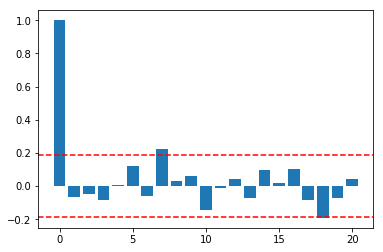

In [225]:
acf_60622 = acf_plot(dat_60622.frac_return.dropna(), nlags=20)

# OLD

In [21]:
prices_chicago = prices[prices.City=='Chicago']
price_by_year = prices_chicago.set_index('RegionName')[[c for c in prices_chicago.columns if c not in 
                                        ['RegionName','City','State','Metro','CountyName', 'SizeRank']]].transpose()

In [162]:
def get_permits_for_zip(zip_code, permits=permits, prices=price_by_year):
    grouped_by_zip = permits[(permits.new_zip==zip_code) &
        (permits.ISSUE_DATE >= prices[zip_code].dropna().index.min()) &
        (permits.ISSUE_DATE <= prices[zip_code].dropna().index.max())].copy()
    grouped_by_zip['month_dt'] = grouped_by_zip.ISSUE_DATE.dt.strftime('%Y%m')
    grouped_by_zip = grouped_by_zip.groupby(['month_dt','PERMIT_TYPE'])['ID'].count().reset_index()
    reg_df = pd.DataFrame(dict(date=(grouped_by_zip.month_dt.unique()) )).set_index('date')
    for perm_type,df in grouped_by_zip.groupby('PERMIT_TYPE'):
        cnt = df.set_index('month_dt')['ID']
        reg_df[perm_type] = cnt
    reg_df = reg_df.fillna(0)
    
    prices = prices.dropna(subset=[zip_code])
    prices = prices.set_index(prices.index.map(lambda s: s.replace('-',''))).copy()
    
#     reg_df['raw_price'] = prices[zip_code]
    reg_df['perc_return'] = prices[zip_code].pct_change() * 100
#     reg_df['log_return'] = np.log(reg_df.raw_return+1)
    
    return reg_df,prices

In [163]:
all_zips = set([z for z in permits.new_zip.unique() if z in price_by_year.columns])

In [164]:
reg_data_li = []

In [170]:
for z in tqdm_notebook(all_zips):
    t,p = get_permits_for_zip(z)
    t['m_1'] = t.perc_return.shift(1)
    t['m_2'] = t.perc_return.shift(2)
    t['m_3'] = t.perc_return.shift(3)
    t['m_4'] = t.perc_return.shift(4)
    t['zip'] = str(z)
    t = t.dropna()
    if not t.empty:
        reg_data_li.append(t)

In [171]:
full_reg_df = pd.concat(reg_data_li).fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [172]:
import statsmodels.api as sm

In [173]:
y = full_reg_df.perc_return
X = pd.get_dummies(full_reg_df.drop('perc_return', axis=1))
X = sm.add_constant(X)

In [174]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            perc_return   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.186
Date:                Thu, 23 May 2019   Prob (F-statistic):           4.65e-15
Time:                        00:34:14   Log-Likelihood:                -15839.
No. Observations:                5868   AIC:                         3.180e+04
Df Residuals:                    5808   BIC:                         3.220e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0951      0.180      0.530      0.596      -0.257       0.447
PERMIT - EASY PERMIT PROCESS       0.0107      0.006      1.662      0.097      -0.002       0.023
PERMIT - ELECTRIC WIRING           0.0231      0.005      4.514      0.000       0.013       0.033
PERMIT - ELEVATOR EQUIPMENT       -0.1063      0.035     -3.064      0.002      -0.174      -0.038
PERMIT - NEW CONSTRUCTION          0.0331      0.021      1.546      0.122      -0.009       0.075
PERMIT - REINSTATE REVOKED PMT     0.1744      0.066      2.635      0.008       0.045       0.304
PERMIT - RENOVATION/ALTERATION    -0.0124      0.011     -1.141      0.254      -0.034       0.009
PERMIT - SCAFFOLDING              -0.0368      0.084     -0.441      0.659      -0.201       0.127
PERMIT - SIGNS                    -0.0200      0.012     -1.729      0.084      -0.043       0.003
PERMIT - WRECKING/DEMOLITION      -0.0181      0.023     -0.800      0.424      -0.063       0.026
m_1                               -0.0015      0.018     -0.082      0.935      -0.038       0.035
m_2                               -0.0710      0.013     -5.391      0.000      -0.097      -0.045
m_3                               -0.0512      0.013     -3.931      0.000      -0.077      -0.026
m_4                               -0.0840      0.013     -6.459      0.000      -0.109      -0.058
zip_60601                          0.0765      0.909      0.084      0.933      -1.706       1.859
zip_60605                          1.6357      0.856      1.911      0.056      -0.042       3.313
zip_60607                         -0.2175      0.478     -0.455      0.649      -1.155       0.720
zip_60608                         -0.2405      0.409     -0.588      0.556      -1.042       0.561
zip_60609                          0.8355      0.419      1.995      0.046       0.014       1.657
zip_60610                         -1.3553      0.671     -2.020      0.043      -2.671      -0.040
zip_60611                         -0.7016      1.018     -0.689      0.491      -2.698       1.294
zip_60612                          1.8902      0.801      2.361      0.018       0.321       3.460
zip_60613                          1.3555      0.841      1.612      0.107      -0.293       3.004
zip_60614                         -0.3636      0.337     -1.078      0.281      -1.025       0.298
zip_60615                          0.2654      0.348      0.762      0.446      -0.417       0.948
zip_60616                         -0.1924      0.761     -0.253      0.800      -1.684       1.299
zip_60617                         -0.4809      0.273     -1.759      0.079      -1.017       0.055
zip_60618                         -0.5642      0.344     -1.640      0.101      -1.239       0.110
zip_60619     

In [177]:
permits[permits.PERMIT_TYPE=='PERMIT - ELEVATOR EQUIPMENT']

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,Community Areas,Zip Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux,full_street_nm,street_num_hundreds,addr_hundreds,zip,new_zip
0,1401011,100017796,PERMIT - ELEVATOR EQUIPMENT,2007-03-16,0.0,0.0,1680.0,1680.0,201,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,200,200 N LAKE SHORE DR,NaN,60611
90,1401836,100018442,PERMIT - ELEVATOR EQUIPMENT,2013-07-31,72000.0,0.0,105.0,105.0,201,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,200,200 N LAKE SHORE DR,NaN,60611
127,1641536,100089206,PERMIT - ELEVATOR EQUIPMENT,2006-01-11,1782920.0,1650.0,0.0,1650.0,1160,W,...,NaN,NaN,NaN,NaN,NaN,W TOUHY AVE,1100,1100 W TOUHY AVE,NaN,0
138,1648571,100093456,PERMIT - ELEVATOR EQUIPMENT,2006-02-01,14000.0,0.0,91.5,91.5,3150,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,3100,3100 N LAKE SHORE DR,60657.0,60657
186,1685216,100115901,PERMIT - ELEVATOR EQUIPMENT,2006-06-01,21175.0,0.0,85.0,85.0,2324,N,...,NaN,NaN,NaN,NaN,NaN,N FREMONT ST,2300,2300 N FREMONT ST,NaN,0
189,1685215,100115900,PERMIT - ELEVATOR EQUIPMENT,2006-06-01,17875.0,0.0,85.0,85.0,2324,N,...,NaN,NaN,NaN,NaN,NaN,N FREMONT ST,2300,2300 N FREMONT ST,NaN,0
262,1769255,100158159,PERMIT - ELEVATOR EQUIPMENT,2007-01-17,1000000.0,0.0,5955.0,5955.0,3150,N,...,NaN,NaN,NaN,NaN,NaN,N LAKE SHORE DR,3100,3100 N LAKE SHORE DR,60657.0,60657
327,1822166,100186201,PERMIT - ELEVATOR EQUIPMENT,2007-06-27,62190.0,0.0,165.0,165.0,4301,N,...,NaN,NaN,NaN,NaN,NaN,N OAK PARK AVE,4300,4300 N OAK PARK AVE,NaN,60706
371,1850634,100201865,PERMIT - ELEVATOR EQUIPMENT,2007-10-03,14190.0,0.0,85.0,85.0,1431,N,...,NaN,NaN,NaN,NaN,NaN,N NORTH PARK AVE,1400,1400 N NORTH PARK AVE,60610.0,60610
407,1877953,100217581,PERMIT - ELEVATOR EQUIPMENT,2007-12-26,14856.0,0.0,97.0,97.0,1215,W,...,NaN,NaN,NaN,NaN,NaN,W SHERIDAN RD,1200,1200 W SHERIDAN RD,NaN,60064
